In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gaussian_mixture_grid import GaussianMixtureGrid
import numpy as np

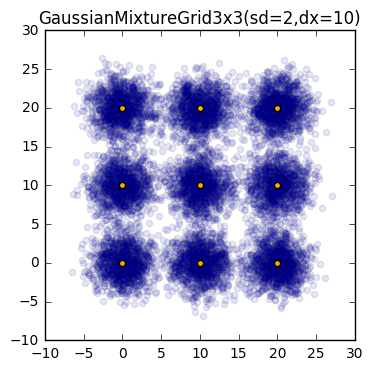

In [2]:
gri2d = GaussianMixtureGrid(3, 2, 10, 2)
plt.figure(figsize=(4,4))
plt.title(gri2d.name)
plt.scatter(*gri2d.sample(10000).T, alpha=0.1)
plt.scatter(*gri2d.means.T, c='orange')
plt.show()

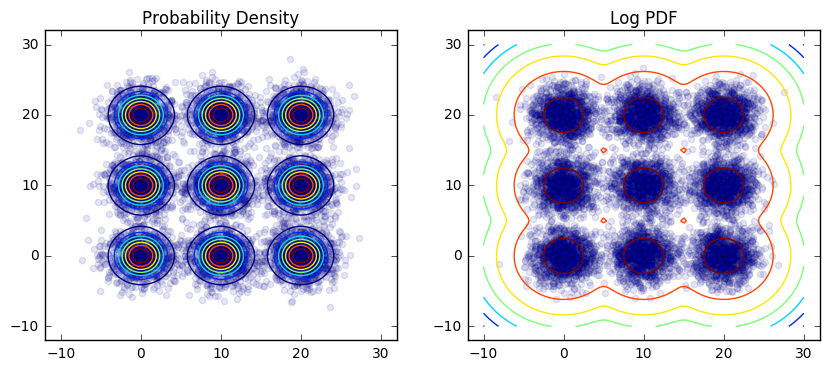

In [3]:
s = np.linspace(-10,30,100)
X,Y = np.meshgrid(s,s)
Z = [[gri2d.logp([x,y]) for x in s] for y in s]

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Probability Density')
plt.scatter(*gri2d.sample(10000).T, alpha=0.1)
plt.contour(X,Y,np.exp(Z))
plt.subplot(122)
plt.title('Log PDF')
plt.contour(X,Y,Z)
plt.scatter(*gri2d.sample(10000).T, alpha=0.1)
plt.show()

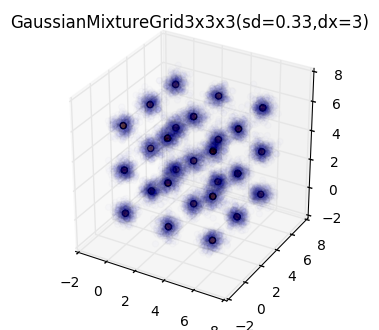

In [4]:
gri3d = GaussianMixtureGrid(3, 3, 3, 0.33)
X, Y, Z = gri3d.sample(10000).T
Xu, Yu, Zu = gri3d.means.T

plt.figure(figsize=(4,4)).add_subplot(111, projection='3d')
plt.title(gri3d.name)
plt.scatter(X, Y, zs=Z, alpha=0.01)
plt.scatter(Xu, Yu, zs=Zu, c='orange')
plt.show()

In [5]:
import pymc3 as pm
with pm.Model() as model:
  mix = gri2d.to_pymc()
  trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = 0.027003: 100%|██████████| 200000/200000 [00:11<00:00, 17065.89it/s]
Finished [100%]: Average ELBO = 0.044024
Evidence of divergence detected, inspect ELBO.
100%|██████████| 10000/10000 [00:05<00:00, 1860.74it/s]


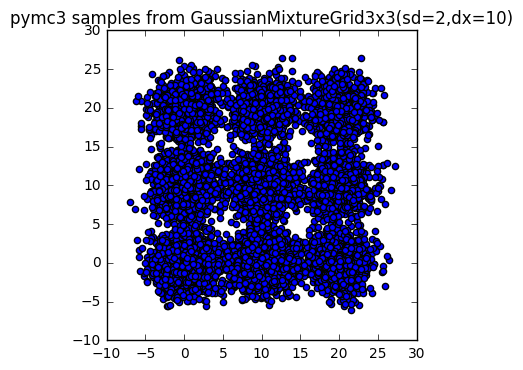

In [7]:
plt.figure(figsize=(4,4))
plt.title('pymc3 samples from {}'.format(gri2d))
plt.scatter(*trace[gri2d.name].T)
plt.show()

In [8]:
with pm.Model() as model2:
  mix2 = gri3d.to_pymc()
  trace2 = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.030873: 100%|██████████| 200000/200000 [00:12<00:00, 15667.75it/s]
Finished [100%]: Average ELBO = -0.02323
Evidence of divergence detected, inspect ELBO.
100%|██████████| 10000/10000 [00:05<00:00, 1797.28it/s]


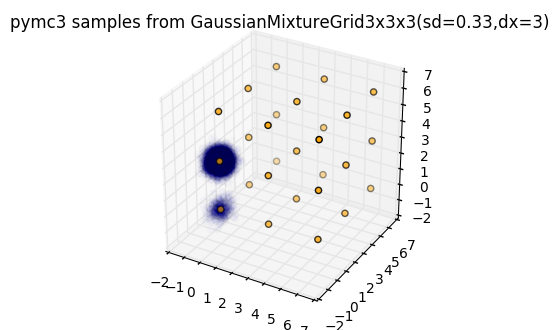

In [9]:
Xs, Ys, Zs = trace2[gri3d.name].T

plt.figure(figsize=(4,4)).add_subplot(111, projection='3d')
plt.title('pymc3 samples from {}'.format(gri3d.name))
plt.scatter(Xs, Ys, zs=Zs, alpha=0.01)
plt.scatter(Xu, Yu, zs=Zu, c='orange')
plt.show()